In [164]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [166]:
# all the unique station in the provided dataset
unique_stations = ['FPZ_04A', 'FSB_126', 'FSB_079', 'FPZ_06A', 'FEX_004', 'FSB_078',
       'FSB_097D', 'FSB_130D', 'FSB_095DR']
finder = {}
for index, val in enumerate(unique_stations):
    finder[val]= index

finder

{'FPZ_04A': 0,
 'FSB_126': 1,
 'FSB_079': 2,
 'FPZ_06A': 3,
 'FEX_004': 4,
 'FSB_078': 5,
 'FSB_097D': 6,
 'FSB_130D': 7,
 'FSB_095DR': 8}

In [168]:
index = 4
df = pd.read_csv(f"../data/{unique_stations[index]}.csv")
df = df.drop(columns = ["station_id","pH MV (mV)", "easting", "northing"])
print(df.shape)

(16789, 17)


In [170]:
df.isna().sum()

Date Time                            0
Actual Conductivity (ÂµS/cm)      9398
Specific Conductivity (ÂµS/cm)    9306
Salinity (psu)                    1307
Resistivity (â„¦-cm)              9398
Density (g/cmÂ³)                  9398
Total Dissolved Solids (mg/L)     1307
pH (pH)                           1215
ORP (mV)                          8134
DO (mg/L)                         8134
% Saturation Oâ‚‚ (% sat)           88
Partial Pressure Oâ‚‚ (psi)        135
Temperature (C)                   8134
External Voltage (V)              8226
Pressure (psi)                    8143
Depth (m)                         8091
Level: Depth to Water (m)         8226
dtype: int64

In [172]:
df.head()

,Date Time,Actual Conductivity (ÂµS/cm),Specific Conductivity (ÂµS/cm),Salinity (psu),Resistivity (â„¦-cm),Density (g/cmÂ³),Total Dissolved Solids (mg/L),pH (pH),ORP (mV),DO (mg/L),% Saturation Oâ‚‚ (% sat),Partial Pressure Oâ‚‚ (psi),Temperature (C),External Voltage (V),Pressure (psi),Depth (m),Level: Depth to Water (m)
0,1.667432e+12,NaN,104.971634,NaN,NaN,NaN,NaN,3.820060,316.683624,7.149662,77.868912,NaN,19.612864,NaN,-6.596952,-4.446477,NaN
1,1.667434e+12,NaN,98.305702,NaN,NaN,NaN,NaN,3.639982,336.763245,7.813544,84.736748,NaN,19.381102,NaN,-6.578016,-4.433165,NaN
2,1.667437e+12,NaN,90.983818,NaN,NaN,NaN,NaN,3.688626,344.089844,8.075914,87.461166,NaN,19.311159,NaN,-6.580556,-4.434970,NaN
3,1.667441e+12,NaN,85.517105,NaN,NaN,NaN,NaN,4.025599,329.548676,8.071102,87.398293,NaN,19.290155,NaN,-6.576590,-4.432182,NaN
4,1.667444e+12,NaN,83.876556,NaN,NaN,NaN,NaN,4.054065,331.944794,8.030844,86.932510,NaN,19.276480,NaN,-6.574686,-4.430809,NaN


In [174]:
imputer = KNNImputer(n_neighbors = 5)

In [176]:
df_imputed_scaled = imputer.fit_transform(df)
df = pd.DataFrame(df_imputed_scaled)

In [177]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.667432e+12,94.742334,104.971634,0.049923,10554.962891,0.9984,62.49997,3.820060,316.683624,7.149662,77.868912,2.472616,19.612864,15.8076,-6.596952,-4.446477,8.614123
1,1.667434e+12,94.742334,98.305702,0.049923,10554.962891,0.9984,62.49997,3.639982,336.763245,7.813544,84.736748,2.472616,19.381102,15.8076,-6.578016,-4.433165,8.614123
2,1.667437e+12,94.742334,90.983818,0.049923,10554.962891,0.9984,62.49997,3.688626,344.089844,8.075914,87.461166,2.472616,19.311159,15.8076,-6.580556,-4.434970,8.614123
3,1.667441e+12,94.742334,85.517105,0.049923,10554.962891,0.9984,62.49997,4.025599,329.548676,8.071102,87.398293,2.472616,19.290155,15.8076,-6.576590,-4.432182,8.614123
4,1.667444e+12,94.742334,83.876556,0.049923,10554.962891,0.9984,62.49997,4.054065,331.944794,8.030844,86.932510,2.472616,19.276480,15.8076,-6.574686,-4.430809,8.614123


In [178]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [188]:
df.columns

RangeIndex(start=0, stop=17, step=1)

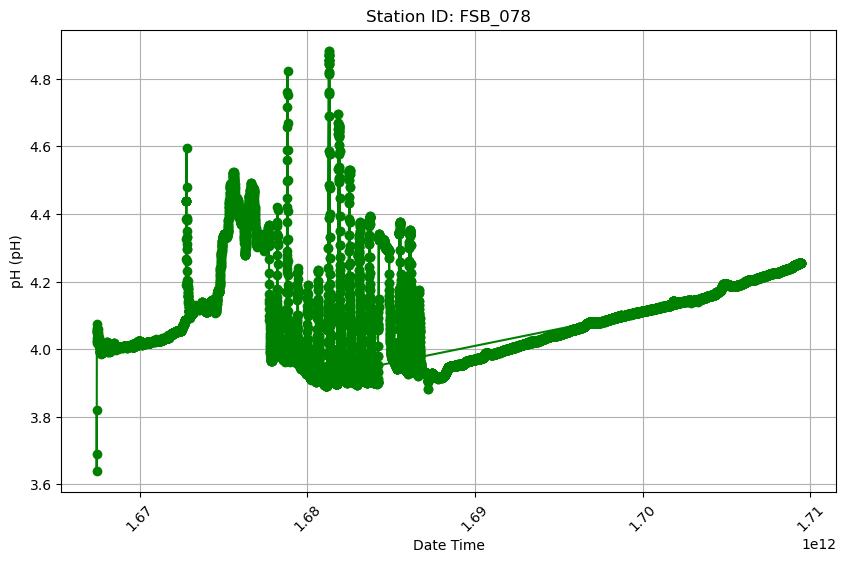

In [190]:
plt.figure(figsize=(10, 6))
plt.plot(df[0], df[7], marker='o', color ="green")
plt.title(f'Station ID: FSB_078')
plt.xlabel('Date Time')
plt.ylabel('pH (pH)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [195]:
scaler = StandardScaler()

In [197]:
df_scaled = scaler.fit_transform(df)

In [201]:
df_scaled.shape

(16789, 17)